In [1]:
import pandas as pd 
import matplotlib 
from matplotlib import pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Load the Data

In [2]:
df = pd.read_csv('csv_result-WISDM_ar_v1.csv', na_values='?')
dfx = pd.read_csv('csv_result-WISDM_ar_v1.csv', na_values='?')
df = df.rename(columns = {'class{':'class'})
dfx = dfx.rename(columns = {'class{':'class'})

In [3]:
df

,id,UNIQUE_ID,user,X0,X1,X2,X3,X4,X5,X6,...,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,RESULTANT,class
0,1,1,33,0.04,0.09,0.14,0.12,0.11,0.10,0.08,...,293.94,1550.00,3.29,7.21,4.00,4.05,8.17,4.05,11.96,Jogging
1,2,2,33,0.12,0.12,0.06,0.07,0.11,0.10,0.11,...,269.44,1233.33,4.23,6.88,4.05,5.43,8.19,5.43,12.05,Jogging
2,3,3,33,0.14,0.09,0.11,0.09,0.09,0.11,0.12,...,248.65,1780.00,4.18,6.89,4.07,5.55,8.19,5.55,11.99,Jogging
3,4,4,33,0.06,0.10,0.09,0.09,0.11,0.07,0.12,...,709.09,1380.00,2.26,4.13,2.49,2.87,4.95,2.87,10.69,Walking
4,5,5,33,0.12,0.11,0.10,0.08,0.10,0.14,0.10,...,3300.00,1775.00,2.29,3.94,2.41,3.08,4.64,3.08,10.80,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,5414,382,19,0.18,0.17,0.00,0.00,0.28,0.00,0.00,...,NaN,208.33,8.91,0.15,0.16,8.91,0.17,8.91,9.28,Sitting
5414,5415,383,19,0.11,0.15,0.00,0.00,0.34,0.00,0.00,...,NaN,361.11,8.95,0.11,0.14,8.95,0.14,8.95,9.30,Sitting
5415,5416,384,19,0.18,0.07,0.00,0.00,0.22,0.00,0.00,...,NaN,287.50,8.96,0.19,0.19,8.97,0.23,8.97,9.28,Sitting
5416,5417,385,19,0.17,0.25,0.00,0.00,0.23,0.00,0.00,...,NaN,1233.33,8.95,0.17,0.33,8.96,0.30,8.96,9.28,Sitting


In [4]:
print(f'({df.shape[0]} rows x {df.shape[1]} columns)')
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

(5418 rows x 47 columns)
fraction of points with missing values: 0.08748615725359911
fraction of missing values in features:
XPEAK    0.070321
YPEAK    0.024179
ZPEAK    0.019011
dtype: float64


In [5]:
y = df['class']
X = dfx.drop(columns = ['id','UNIQUE_ID','class'])

In [6]:
classes, counts = np.unique(y,return_counts=True)
print(classes, counts)
print('balance:',np.max(counts/len(y)))
print('Data is inblanced, there are much more walking and jogging classes than any other')

['Downstairs' 'Jogging' 'Sitting' 'Standing' 'Upstairs' 'Walking'] [ 528 1625  306  246  632 2081]
balance: 0.38409007013658175
Data is inblanced, there are much more walking and jogging classes than any other


In [7]:
id = np.unique(df['user'])
print(id)
user = df['user']

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]


## EDA

**Imbalance**

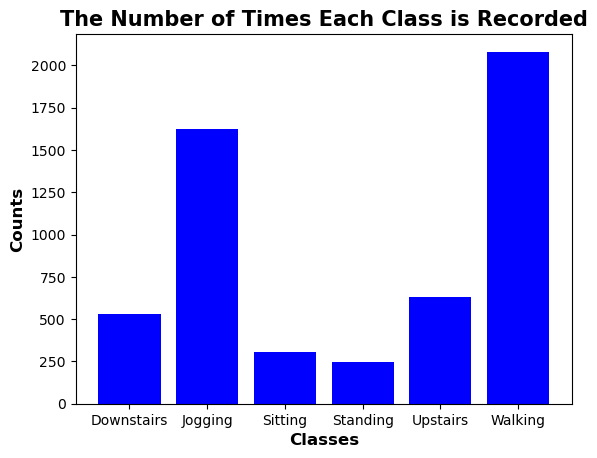

In [8]:
#Bar plot with 5 more important features 
plt.bar(classes, counts, color='blue')
plt.xlabel('Classes', weight='bold', fontsize=12)
plt.ylabel('Counts', weight = 'bold', fontsize=12)
plt.title('The Number of Times Each Class is Recorded', weight = 'bold', fontsize=15)
plt.show()

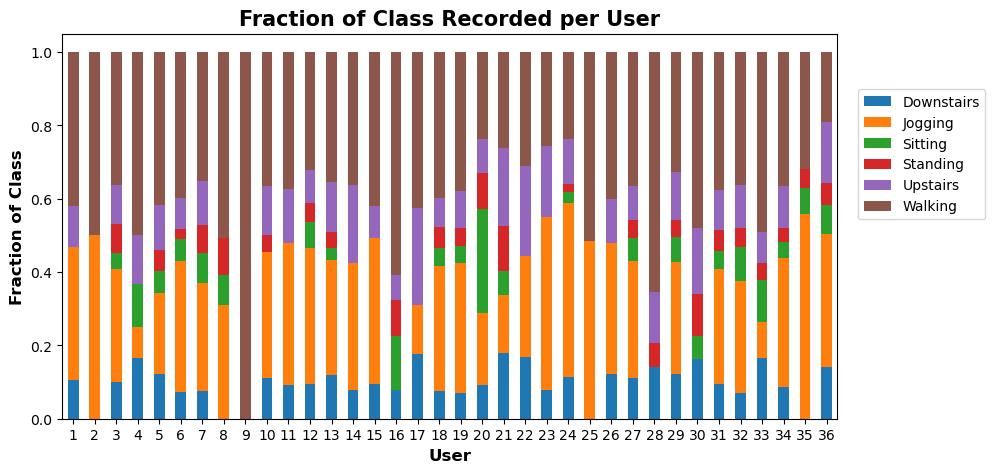

In [9]:
count_matrix = df.groupby(['user', 'class']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True,figsize=(10,5))
plt.ylabel('Fraction of Class', weight = 'bold',fontsize=12)
plt.xlabel('User', weight='bold',fontsize=12)
plt.xticks(rotation=0)
plt.title('Fraction of Class Recorded per User', weight='bold',fontsize=15)
plt.legend(bbox_to_anchor = (1.2,0.5), loc = 'lower right')
plt.show()

**Average Acceleration**

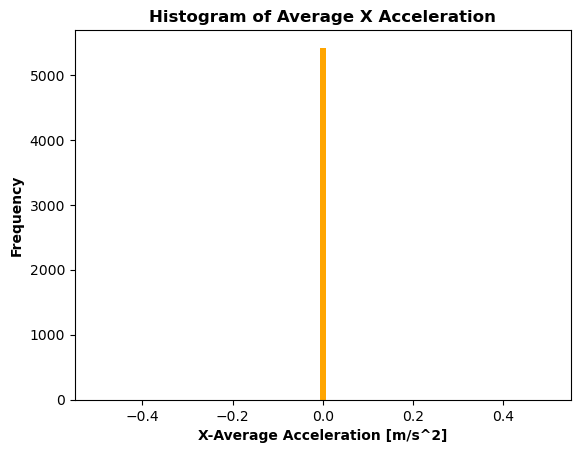

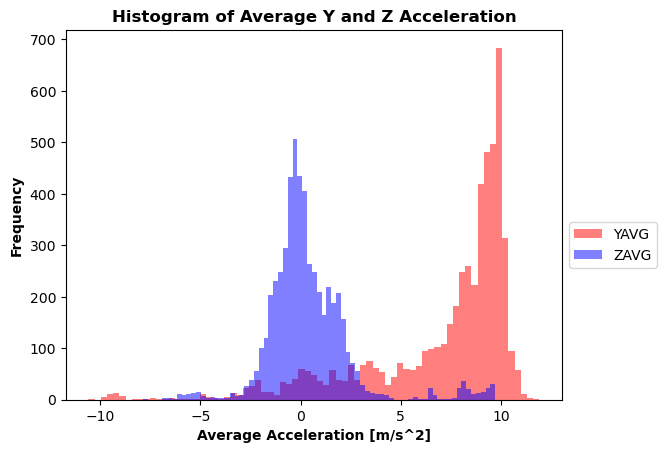

In [10]:
# Histogram of each XYZ Average 
#X Average
df['XAVG'].plot.hist(bins = int(np.sqrt(df.shape[0])), color = 'orange')
plt.xlabel('X-Average Acceleration [m/s^2]', weight='bold')
plt.title('Histogram of Average X Acceleration', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.show()

#Y Average
df['YAVG'].plot.hist(bins = int(np.sqrt(df.shape[0])), color = 'red', alpha=0.5)

#Z Average 
df['ZAVG'].plot.hist(bins = int(np.sqrt(df.shape[0])), color='blue', alpha = 0.5)
plt.xlabel('Average Acceleration [m/s^2]', weight='bold')
plt.title('Histogram of Average Y and Z Acceleration', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.legend(bbox_to_anchor = (1,0.5))
plt.show()

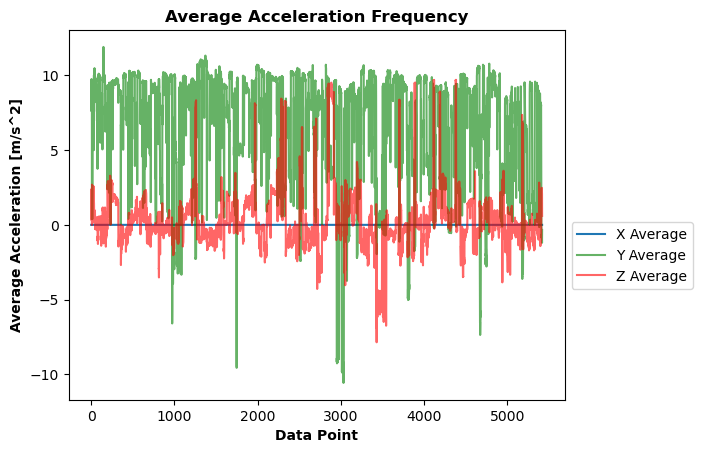

In [11]:
# Plot XYZ Averages 
plt.plot(df['id'],df['XAVG'], label = 'X Average')
plt.plot(df['id'],df['YAVG'], label = 'Y Average',color='green',alpha=0.6)
plt.plot(df['id'],df['ZAVG'], label = 'Z Average',color='red', alpha =0.6)
plt.legend(bbox_to_anchor = (1,0.5))
plt.ylabel('Average Acceleration [m/s^2]', weight='bold')
plt.title('Average Acceleration Frequency', weight='bold')
plt.xlabel('Data Point', weight='bold')
plt.show()

**XYZ PEAKS**

In [12]:
df_median = dfx
XPEAK_median = dfx['XPEAK'].median()
df_median['XPEAK'] = dfx['XPEAK'].fillna(XPEAK_median)

YPEAK_median = dfx['YPEAK'].median()
df_median['YPEAK'] = dfx['YPEAK'].fillna(YPEAK_median)

ZPEAK_median = dfx['ZPEAK'].median()
df_median['ZPEAK'] = dfx['ZPEAK'].fillna(ZPEAK_median)

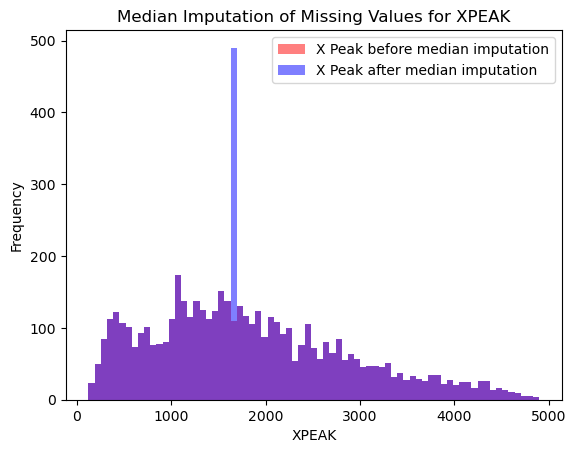

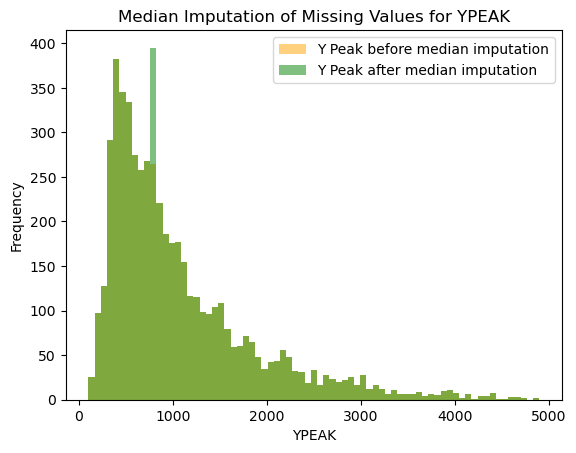

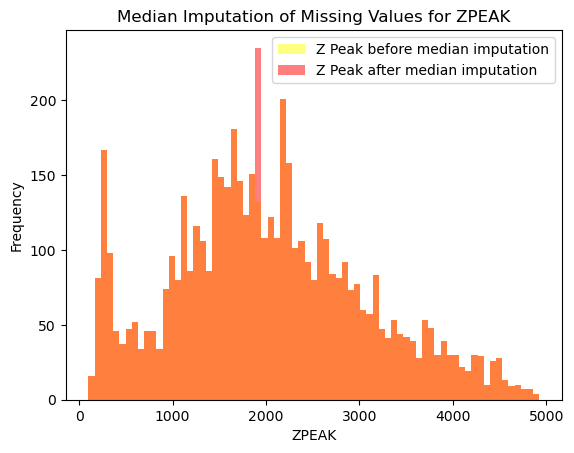

In [13]:

df['XPEAK'].plot.hist(bins = int(np.sqrt(df.shape[0])), label ='X Peak before median imputation',color = 'red', alpha=0.5)
df_median['XPEAK'].plot.hist(bins = int(np.sqrt(df_median.shape[0])), label='X Peak after median imputation',color = 'blue', alpha=0.5)
plt.xlabel('XPEAK')
plt.title('Median Imputation of Missing Values for XPEAK')
plt.legend()
plt.show()

df['YPEAK'].plot.hist(bins = int(np.sqrt(df.shape[0])), label='Y Peak before median imputation', color = 'orange', alpha=0.5)
df_median['YPEAK'].plot.hist(bins = int(np.sqrt(df_median.shape[0])), label='Y Peak after median imputation',color = 'green', alpha=0.5)
plt.xlabel('YPEAK')
plt.title('Median Imputation of Missing Values for YPEAK')
plt.legend()
plt.show()

df['ZPEAK'].plot.hist(bins = int(np.sqrt(df.shape[0])), label='Z Peak before median imputation', color = 'yellow', alpha=0.5)
df_median['ZPEAK'].plot.hist(bins = int(np.sqrt(df_median.shape[0])), label='Z Peak after median imputation', color = 'red', alpha=0.5)
plt.xlabel('ZPEAK')
plt.title('Median Imputation of Missing Values for ZPEAK')
plt.legend()
plt.show()

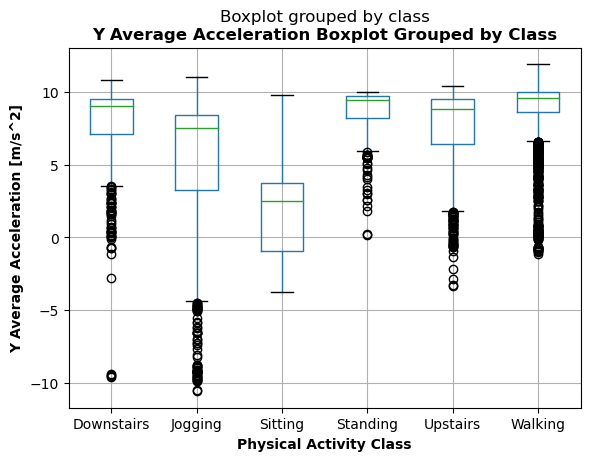

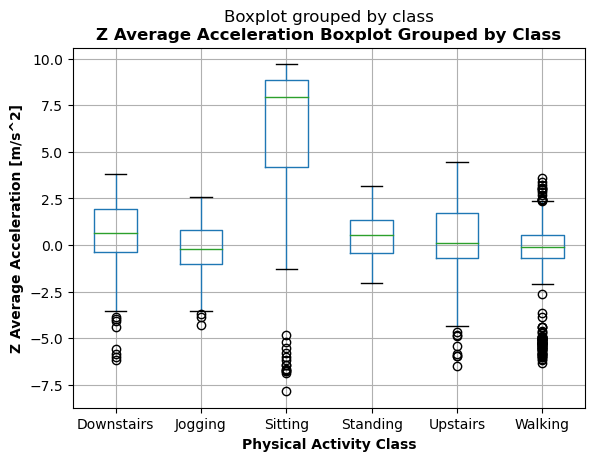

In [14]:
df[['YAVG','class']].boxplot(by='class')
plt.xlabel('Physical Activity Class',weight='bold')
plt.ylabel('Y Average Acceleration [m/s^2]',weight='bold')
plt.title('Y Average Acceleration Boxplot Grouped by Class', weight='bold')
plt.show()

df[['ZAVG','class']].boxplot(by='class')
plt.xlabel('Physical Activity Class',weight='bold')
plt.ylabel('Z Average Acceleration [m/s^2]',weight='bold')
plt.title('Z Average Acceleration Boxplot Grouped by Class', weight='bold')
plt.show()

## Split Data 

In [15]:
def ML_pipeline_groups(X,y,groups,random_state,n_folds):
    # create a test set based on groups
    splitter = GroupShuffleSplit(n_splits=1,test_size=0.2,random_state=random_state) #group based splitting 
    for i_other,i_test in splitter.split(X, y, groups): #don't use test_train_split 
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]
        print('Test set:', X_test.shape, y_test.shape)
    # splitter for _other
    kf = GroupKFold(n_splits=n_folds)
    for train_index, val_index in kf.split(X_other, y_other, groups_other):
        # print("TRAIN:", train_index, "VAL:", val_index)
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        print('Train set:', X_train.shape, y_train.shape)
        print('Validation set:',X_val.shape, y_val.shape)
    return X_train, y_train, X_test, y_test, X_val, y_val

In [16]:
X_train, y_train, X_test, y_test, X_val, y_val = ML_pipeline_groups(X,y,user,42,5)

Test set: (1327, 44) (1327,)
Train set: (3275, 44) (3275,)
Validation set: (816, 44) (816,)
Train set: (3309, 44) (3309,)
Validation set: (782, 44) (782,)
Train set: (3261, 44) (3261,)
Validation set: (830, 44) (830,)
Train set: (3259, 44) (3259,)
Validation set: (832, 44) (832,)
Train set: (3260, 44) (3260,)
Validation set: (831, 44) (831,)


## Preprocessing

In [17]:
pd.set_option('display.max_rows', X.shape[1])
print(X.dtypes)

user           int64
X0           float64
X1           float64
X2           float64
X3           float64
X4           float64
X5           float64
X6           float64
X7           float64
X8           float64
X9           float64
Y0           float64
Y1           float64
Y2           float64
Y3           float64
Y4           float64
Y5           float64
Y6           float64
Y7           float64
Y8           float64
Y9           float64
Z0           float64
Z1           float64
Z2           float64
Z3           float64
Z4           float64
Z5           float64
Z6           float64
Z7           float64
Z8           float64
Z9           float64
XAVG           int64
YAVG         float64
ZAVG         float64
XPEAK        float64
YPEAK        float64
ZPEAK        float64
XABSOLDEV    float64
YABSOLDEV    float64
ZABSOLDEV    float64
XSTANDDEV    float64
YSTANDDEV    float64
ZSTANDDEV    float64
RESULTANT    float64
dtype: object


In [36]:
cols = X_train.columns
std_ftrs =cols[1:]

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

#Add back the User column
train_col = X_train['user']
val_col = X_val['user']
test_col = X_test['user']

X_train_prep = np.column_stack((train_col, X_train_prep))
X_val_prep = np.column_stack((val_col, X_val_prep))
X_test_prep = np.column_stack((test_col, X_test_prep))

#PRINT
print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(3260, 44)
(3260, 44)
[[33.         -0.69519764 -0.15087831 ...  1.19511788 -0.73109244
   0.14372824]
 [33.          0.34823897  0.34915213 ...  1.20287869 -0.30104875
   0.178842  ]
 [33.          0.60909812 -0.15087831 ...  1.20287869 -0.26365364
   0.15543283]
 ...
 [19.          1.13081642 -0.48423193 ... -1.88592563  0.80210682
  -0.90188142]
 [19.          1.00038685  2.51595071 ... -1.85876278  0.79899056
  -0.90188142]
 [19.         -0.56476807 -0.31755512 ... -1.60265589  0.78029301
  -3.56272392]]
